# Group Members:
Venish Patel  V00949366, 

Ridhi  V00941329


## Abstract
In this project, we are using dataset containing transactions made br credit card users in September 2013, and we aim to construct a model that could analyse these transactions using the given data based on the ones that turned out to be fraud. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
To identify the fraud transactions we need to apply certain algorithms like logistic regression, random forest classifier, svm, etc to find out what model is best suited for our data frame. But before doing that, we need to understand what is given in our data and determine its usefulness.

## Introduction
The dataset that is used here has around 0.2% of fraud transactions that account for positive class out of a total of 284,807 transactions. Its highly imbalanced and has only numerical values that are obtained from PCA transformations. Since, the data that is dealt with here has a lot of confidential data about the users, like their card numbers, pins, name, addresses, etc, features V1,....,V28 are encrypted and we only can work with the Amount of the transaction, and Time between each transaction occurence as they have not been affected by the PCA transformation. 'Class' feature takes values 0 and 1 in case of fraud and non-fraud transactions.

## Dataset
As already discussed above, our data has a total of 284,807 instances.
Objective: Identify all the fraud transactions.

Features V1,V2,....,V28 are obtained through PCA transformations due to confidentiality issues.

Amount: This determines the amount of transaction

Time: This determines the time elapsed between each transaction

Class: This is a response variable which toggles between two values, 0 and 1, for fraud and non-fraud transactions respectively.


In [62]:
import numpy as np 
import pandas as pd 
import IPython
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from pylab import rcParams
import seaborn as sns
from sklearn.preprocessing import RobustScaler
rcParams['figure.figsize'] = 15, 7

In [63]:
df = pd.read_csv("creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
df.shape

(284807, 31)

In [65]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Since, we are using a large dataset, it covers a lot of memory, so its very crucial to reduce the memory usage as much as possible

In [66]:
def memory_reduction(df):
   
    me_st = df.memory_usage().sum() / 1024**2
    print('Memory Used by DataFrame: {} MB'.format(me_st))
    
    for cl in df.columns:
        clt = df[cl].dtype
        
        if clt != object:
            minimum_cl = df[cl].min()
            maximum_cl = df[cl].max()
            if str(clt)[:3] == 'int':
                if minimum_cl > np.iinfo(np.int8).min and maximum_cl < np.iinfo(np.int8).max:
                    df[cl] = df[cl].astype(np.int8)
                elif minimum_cl > np.iinfo(np.int16).min and maximum_cl < np.iinfo(np.int16).max:
                    df[cl] = df[cl].astype(np.int16)
                elif minimum_cl > np.iinfo(np.int32).min and maximum_cl < np.iinfo(np.int32).max:
                    df[cl] = df[cl].astype(np.int32)
                elif minimum_cl > np.iinfo(np.int64).min and maximum_cl < np.iinfo(np.int64).max:
                    df[cl] = df[cl].astype(np.int64)  
            else:
                if minimum_cl > np.finfo(np.float16).min and maximum_cl < np.finfo(np.float16).max:
                    df[cl] = df[cl].astype(np.float16)
                elif minimum_cl > np.finfo(np.float32).min and maximum_cl < np.finfo(np.float32).max:
                    df[cl] = df[cl].astype(np.float32)
                else:
                    df[cl] = df[cl].astype(np.float64)
        else:
            df[cl] = df[cl].astype('category')

    me_en = df.memory_usage().sum() / 1024**2
    print('Memory Used by DataFrame after optimization/reduction: {} Megabytes'.format(me_en))
    print('Percentage of memory reduced: {} %'.format(100 * (me_st - me_en) / me_st))
    
    
    return df

df = memory_reduction(df)

Memory Used by DataFrame: 67.3601303100586 MB
Memory Used by DataFrame after optimization/reduction: 17.111702919006348 Megabytes
Percentage of memory reduced: 74.5966897031802 %


In the below column, we check for any missing values in our data which cleary turns out to be null

In [67]:
tt = df.isnull().sum().sort_values(ascending = False)
pct = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([tt, pct], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Analysis
It is a process used to evaluate data using analytical and statistical tools in order to discover the usefulness of our data that can further help us in decision making.

Here, it is observed that the ratio between non-fraud and fraud transactions is 99.8 to 0.2 approximately, and 'Class' is used to predict whether the transaction is fraudulent or not. Also in the above section we saw that there is no missing value in our data. Let us take a deeper look into our data by visualising our data.

In [68]:
print('Ratio of Transactions: non-fraud vs fraud')
print(round(df['Class'].value_counts()[0]/len(df) * 100,2),':', round(df['Class'].value_counts()[1]/len(df) * 100,2))

Ratio of Transactions: non-fraud vs fraud
99.83 : 0.17


0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, 'Frequency')

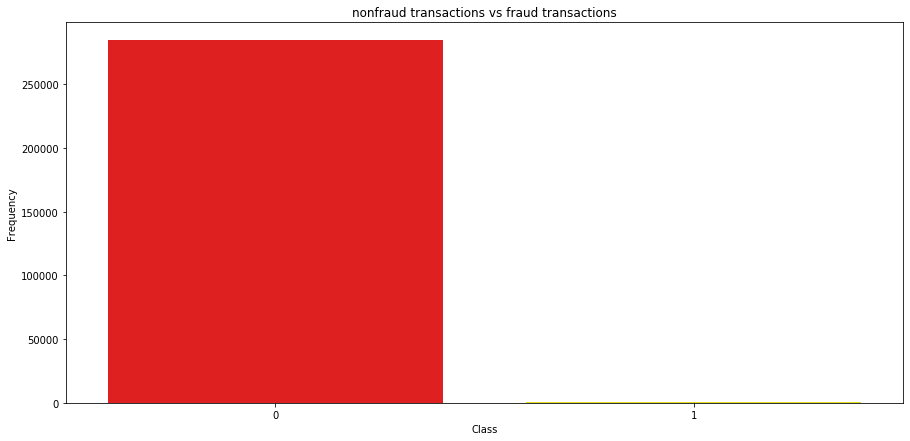

In [69]:
ct_c = pd.value_counts(df['Class'], sort = True).sort_index()
print(ct_c)
clr = ["red", "yellow"]
sns.countplot('Class', data=df, palette=clr)
#plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=12)
plt.title("nonfraud transactions vs fraud transactions")
plt.xlabel("Class")
plt.ylabel("Frequency")

## Data Visualisation
It helps to generate hidden insights from the data by placing the information into the form of a graph or a plot or any other visual context. 

Its also makes the data easily readable for the users and for people who do not have a deep understanding of the data. It helps in determining patterns, trends and outliers in the data. Visualization is also required to figure out which features are responsible for changes in the target variable. This is called feature correlation.

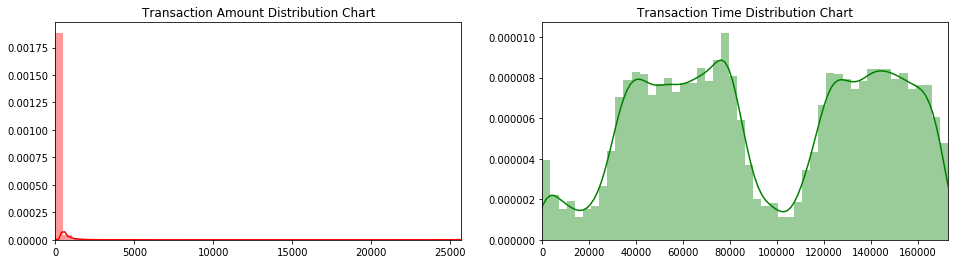

In [70]:
#Let us explore the distribution to have an idea how data is spread out. The distribution of transaction time is binomial in nature.

diag, axis = plt.subplots(1, 2, figsize=(16,4))
#diag.suptitle('Distribution', fontsize=16)
value_for_amt = df['Amount'].values
value_for_time = df['Time'].values
clr = ["red", "green"]

sns.distplot(value_for_time, ax=axis[1], color=clr[1])
axis[1].set_title('Transaction Time Distribution Chart')
axis[1].set_xlim([min(value_for_time), max(value_for_time)])
sns.distplot(value_for_amt, ax=axis[0], color=clr[0])
axis[0].set_title('Transaction Amount Distribution Chart')
axis[0].set_xlim([min(value_for_amt), max(value_for_amt)])


plt.show()

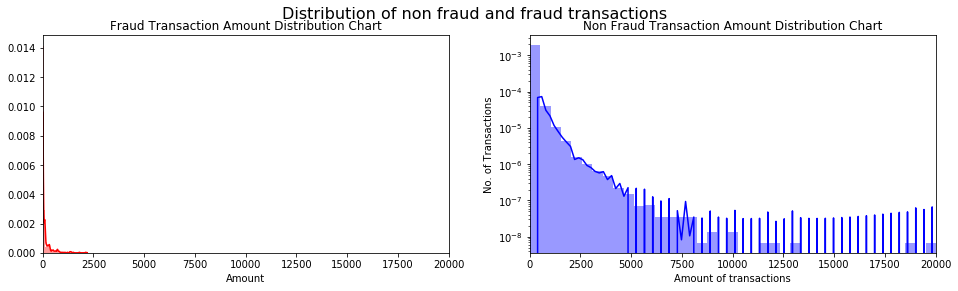

In [71]:
diag, axis = plt.subplots(1, 2, figsize=(16,4), sharex=True)
diag.suptitle('Distribution of non fraud and fraud transactions', fontsize=16)
clr = ["red", "blue"]

sns.distplot(df[df['Class']==1].Amount, ax=axis[0], color=clr[0])
plt.xlabel('Amount of transactions')
plt.ylabel('No. of Transactions')
#plt.xlim((0, 20000))
#plt.yscale('log')
axis[0].set_title('Fraud Transaction Amount Distribution Chart')

sns.distplot(df[df['Class']==0].Amount, ax=axis[1], color=clr[1])
axis[1].set_title('Non Fraud Transaction Amount Distribution Chart')
plt.xlabel('Amount of transactions')
plt.ylabel('No. of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


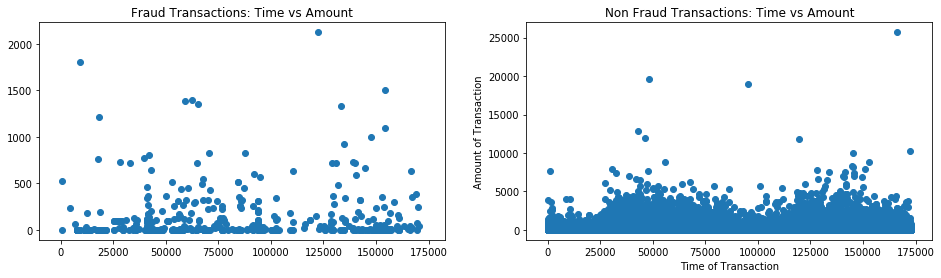

In [72]:
diag, axis = plt.subplots(1, 2, figsize=(16,4), sharex=True)
#diag.suptitle('Time of transaction vs Amount', fontsize=12)
clr = ["blue", "blue"]

axis[0].scatter(df[df['Class']==1].Time, df[df['Class']==1].Amount)
axis[0].set_title('Fraud Transactions: Time vs Amount')
plt.xlabel('Time of Transaction')
plt.ylabel('Amount of Transaction')
axis[1].scatter(df[df['Class']==0].Time, df[df['Class']==0].Amount)
axis[1].set_title('Non Fraud Transactions: Time vs Amount')
plt.xlabel('Time of Transaction')
plt.ylabel('Amount of Transaction')
plt.show()

In [73]:
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

diag = go.Scatter(
    x = df[df['Class']==1].Time,
    y = df[df['Class']==1].Amount,
    mode = 'markers'
)

plotly.offline.iplot({
    "data": [diag],
    "layout": go.Layout(title="Plotting a graph between amount and time")
})

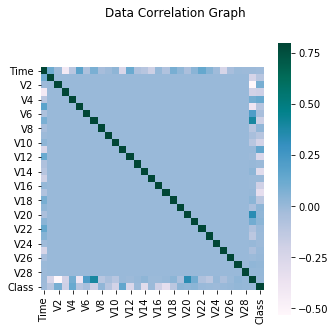

In [74]:
matrix = df.corr()
diag = plt.figure(figsize=(5,5))
diag.suptitle('Data Correlation Graph', fontsize=12)
sns.heatmap(matrix,vmax=0.8,square = True,cmap='PuBuGn')

plt.show()

# References
- We have used Credit Card Fraud Detection Data 
https://www.kaggle.com/mlg-ulb/creditcardfraud